In [1]:
!pip install itertools
!pip install ndlib

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from itertools import combinations    
import operator

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
You should consider upgrading via the 'c:\users\administrator\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\administrator\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [2]:
network_list = [
"Zachary’s_karate_club_(ZKC)",#0
"Dolphins_Network_(DN)",#1
"USAir97_Network_(UAN)",#2
"Bio-Diseasome_(BD)",#3
"Soc-wiki-Vote_(SWV)",#4
"E-mail_Network_(EN)"#5
]

index = input('Choose a Network Index:')

net_name = network_list[int(index)]

Choose a Network Index:0


In [3]:
import matplotlib.pyplot as plt
import networkx as nx

if int(index) == 0:
    H = nx.karate_club_graph()
    #print number of nodes and edges in the network
    print(H.number_of_nodes(),H.number_of_edges())
else:   
    
    fh=open("DataSet/"+str(net_name)+".txt", 'rb')

    H = nx.read_weighted_edgelist(fh,nodetype=int, encoding='utf-8')
    fh.close()
    #H = nx.convert_node_labels_to_integers(H, first_label=1, ordering="default", label_attribute = None)
    #print number of nodes and edges in the network
    print(H.number_of_nodes(),H.number_of_edges())

34 78


<p>Check if the Network is a scale-free network, to be a simplistic scale-free network is a network with a scale-free degree distribution</p>

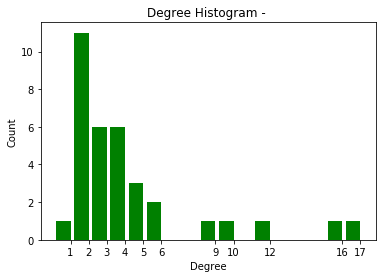

In [4]:

import collections

degree_sequence = sorted([d for n, d in H.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
    

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='g')
plt.title("Degree Histogram - ")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
    
plt.savefig("img_results/"+str(net_name)+"_dd.png")
plt.show()

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


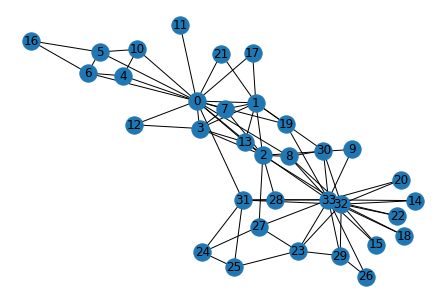

In [5]:
#show the network graph
plt.clf()
nx.draw(H, with_labels = True)
plt.savefig("img_results/"+str(net_name)+"_net_graph.png")
plt.show()

<h3>Centrality Table</h3>

In [6]:
def Triangles_Ranking(H):
    Triangles = list(nx.triangles(H, nodes=None).items())
    Triangles.sort(key=lambda elem: elem[1], reverse=True)
    Triangles_table = pd.DataFrame(Triangles, columns = ('TR','TR_i'))
    
    return Triangles, Triangles_table

Triangles_list, Triangles_table = Triangles_Ranking(H)

def Betweeness_Ranking(H):
    Betweeness = list(nx.betweenness_centrality(H).items())
    Betweeness.sort(key=lambda elem: elem[1], reverse=True)
    Betweeness_table = pd.DataFrame(Betweeness, columns = ('BC','BC_i'))
    
    return Betweeness,Betweeness_table

Betweeness_list,Betweeness_table = Betweeness_Ranking(H)   

def closeness_Ranking(H):
    Closeness = list(nx.closeness_centrality(H).items())
    Closeness.sort(key=lambda elem: elem[1], reverse=True)
    Closeness_table = pd.DataFrame(Closeness, columns = ('CNC','CNC_i'))
    
    return Closeness,Closeness_table

Closeness_list,Closeness_table = closeness_Ranking(H)

def Pagerank_Ranking(H):
    Pagerank = list(nx.pagerank(H, alpha=0.3).items())
    Pagerank.sort(key=lambda elem: elem[1], reverse=True)
    Pagerank_table = pd.DataFrame(Pagerank, columns = ('PR','PR_i'))
    
    return Pagerank,Pagerank_table

Pagerank_list,Pagerank_table = Pagerank_Ranking(H)

### craete a table that conatains all the centrality ranking

In [7]:
centrality_table = pd.concat([Triangles_table,Betweeness_table,
                         Closeness_table, Pagerank_table], 
                                 axis=1, sort=False)
centrality_table.index = centrality_table.index + 1
Top_centrality_table = pd.DataFrame(centrality_table.loc[0:5])
Top_centrality_table

,TR,TR_i,BC,BC_i,CNC,CNC_i,PR,PR_i
1,0,18,0,0.437635,0,0.568966,33,0.063634
2,33,15,33,0.304075,2,0.559322,0,0.060638
3,32,13,32,0.145247,33,0.550000,32,0.049160
4,1,12,2,0.143657,31,0.540984,1,0.039268
5,2,11,31,0.138276,8,0.515625,2,0.038933


### save centrality table

In [8]:
centrality_table.to_csv('csv_results/'+str(net_name)+'_cent.csv')#save Classical Centrality rankings
Top_centrality_table.to_csv('csv_results/'+str(net_name)+'_top_cent.csv')#save top three ranking of the Classical Centrality

### Get i's the Triangle Neighbors
<p>
Definition 4.2: “Given G (V, E) undirected, unweighted graph with V nodes and E edges. We construct a planar sub-network represented by a subgraph Gi. Given Gi let be the list of one-hop is neighbors of node I and let  represents the list of one-hop triangle connected neighbors of node vi. for vj and k neighbors of node vi, if there exists a link between node vj and k then append node j and k to list .”
</p>

In [9]:
def nodes_in_triangle(H, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(H.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if H.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

#Selection Constraint(Equetion)
def selection_constrain_of(i):
     # degree of N_i:
        N_i = subgraph_of(i).number_of_nodes()
        # sum(sdeg_j):
        sum_sdeg_j = subgraph_of(i).number_of_edges()
        # number of triangles: nodes
        NT_i = nx.triangles(H,i)
        if NT_i > 1:
        #equetion 1:selection constrain        
            TR_i = (N_i-((sum_sdeg_j-N_i)/2))            
            return  TR_i
    
#Selection Algorithm
def Selection_Algorithm():
    # main part of AL loop
    valid_set = []
    for i in H.nodes: 
        subgraph = subgraph_of(i)
        # degree of Ni:
        N_i = subgraph.number_of_nodes()
        # number of triangles: nodes
        NT_i = nx.triangles(H,i)
        # Extract the nodes of interest: nodes
        nodes = [n for n, d in subgraph.nodes(data=True)]
        # Create the set of nodes: nodeset
        nodeset = set(nodes)
        #equetion 1:selection constrain
        if NT_i > 1:
            TR_i = selection_constrain_of(i)                   
            list1 = i, NT_i     
            valid_set.append(list1)
                
    return  valid_set

#return the list of selected nodes
def sel_subgraphs():
    sel_subgraphs = []
    for i in H:
        sel_subgraph = H.subgraph(nodes_in_triangle(H, i))
        NT_i = nx.triangles(H,i)
        if NT_i > 1:            
            row = i        
            sel_subgraphs.append(row)
    return  sel_subgraphs

#return a subgraph i
def subgraph_of(i):
    subgraph = H.subgraph(nodes_in_triangle(H, i))
    return  subgraph  

<h3>Tr-ceyntrality (TC)</h3>
<p>Definition 4.4  Let |Vi | be the number of nodes in node i's one-hop triangle neighborhood (node I included) so that we can simply representas sdegi, as a consequent to the first section of equation (4.1), which is and can also be replaced by and we replace the two unique constrain j1 and j2 as |Vi | and NTi (which is the number of triangles in node i’s neighborhood) respectively. Our modified equations can be defined as:</p>

In [10]:
#Equetion 1: Tr-ceyntrality
def TC_of(i):
    #degree of node i
    sdeg_i = (subgraph_of(i).number_of_nodes()-1)
    # number of nodes in G_i:
    N_i = subgraph_of(i).number_of_nodes()
    # number of triangles:
    NT_i = nx.triangles(H,i)
    #sumof_sdeg_i
    sum_sdeg_i = (subgraph_of(i).number_of_edges()*2)
    #equetion 3:Tr centrality value of TC_i
    #TC_i = (3*(sdeg_i-1)-(2*(N_i)-NT_i))+sum_sdeg_i  
  
    TC_i = 3*(sdeg_i-1)-(2*(N_i)+NT_i)+sum_sdeg_i+selection_constrain_of(i)
    #tc_i= TC_i *0.01
    
    return   TC_i

#Loop tr-ceyntrality of the selected Set Of Subgraphs
def loop_TC():
    # main part of AL loop
    i=0
    TC_list=[]
    for i in H.nodes:        
        # degree of Ni:
        N_i = subgraph_of(i).number_of_nodes()
        # number of triangles: nodes
        NT_i = nx.triangles(H,i)
        # Extract the nodes of interest: nodes
        nodes = [n for n, d in subgraph_of(i).nodes(data=True)]
        # Create the set of nodes: nodeset
        nodeset = set(nodes)
        #equetion 1:selection constrain
        if NT_i > 1:
                TR_i = round(TC_of(i), 4)
                #TR_i = TC_of(i)
                TC = (i, TR_i)       
                TC_list.append(TC)               
                   
    return  TC_list

<h3>Graph Entropy (PI)</h3>
Entropy-Based Centrality 

In [11]:
#Graph Entropy 

def log1(i):
    sum_sdeg_i = (subgraph_of(i).number_of_edges()*2)
    s1 = math.log(sum_sdeg_i, 10)
    return  s1
def prob(i, j): 
    sum_sdeg_i = (subgraph_of(i).number_of_edges()*2)
    nodes = subgraph_of(i).nodes
    degree = subgraph_of(i).degree[j]
    prob=-(degree/sum_sdeg_i )
    return prob  
def log2(i,j):
    degree = subgraph_of(i).degree[j]
    log_j = math.log(degree, 10)
    return log_j
def probs(i):
    probs=[]
    for i in subgraph_of(i).nodes:
        for j in subgraph_of(i).nodes:
            enr = (prob(i, j)*log2(i,j)) 
            #enr=(i, en)
        probs.append(enr)  
    return probs 

def PI_of(i):
    sum_sdeg_i = (subgraph_of(i).number_of_edges()*2)
    NT_i = nx.triangles(H,i)
    sdeg=subgraph_of(i).degree(i)
    s1 = (math.log(sum_sdeg_i, 10)+NT_i)
    #equetion 4:en value of PI_i
    PI_i =s1-sum(probs(i))
    return PI_i

#LOOP PI of the selected Set Of Subgraph
def loop_PI():
    i=0
    PI_list=[]    
    for i in sel_subgraphs():
        NT_i = nx.triangles(H,i)
        if NT_i > 1:            
            PI_i = round(PI_of(i), 4)
            PI = i, PI_i
            PI_list.append(PI)  
            
    return  PI_list

<h3>Constraint Coefficient (CC)</h3>

In [12]:
__all__ = ['constraint', 'local_constraint', 'effective_size']

def mutual_weight(H, u, v, weight=None):
    try:
        a_uv = H[u][v].get(weight, 1)
    except KeyError:
        a_uv = 0
    try:
        a_vu = H[v][u].get(weight, 1)
    except KeyError:
        a_vu = 0
    return a_uv + a_vu


def normalized_mutual_weight(H, u, v, norm=sum, weight=None):
    scale = norm(mutual_weight(H, u, w, weight)
                 for w in set(nx.all_neighbors(H, u)))
    
    return 0 if scale == 0 else mutual_weight(H, u, v, weight) / scale

#Returns the constraint on all nodes in the graph H
def constraint(H, nodes=None, weight=None):   
    if nodes is None:
        nodes = H
    constraint = {}
    for v in sel_subgraphs():
        # Constraint is not defined for isolated nodes
        if len(H[v]) == 0:
            constraint[v] = float('nan')
            continue
        constraint[v] = sum(local_constraint(H, v, n, weight)
        for n in set(nx.all_neighbors(H, v)))               
    return constraint

#Returns the local constraint on the node `u` with respect to the node `v` in the graph H
def local_constraint(H, u, v, weight=None):
    nmw = normalized_mutual_weight
    direct = nmw(H, u, v, weight=weight)
    indirect = sum(nmw(H, u, w, weight=weight) * nmw(H, w, v, weight=weight)
                   for w in set(nx.all_neighbors(H, u)))
    return (direct + indirect) ** 2

#Ranking
#return sorted list of node and it Constraint_Coefficient
sorted_CC = sorted(constraint(H, nodes=None, weight=None).items(), 
                  key=operator.itemgetter(1))

#return the CC of node i
def CC_of(i):
    CC_of_i = constraint(H, nodes=None, weight=None).get(i)
    return CC_of_i

<h3>Get Sorted(Rank) Result</h3>

In [13]:
def rank_list(unsorted_list):
    sorted_list = unsorted_list
    sorted_list.sort(key=lambda elem: elem[1], reverse=True)
    
    return sorted_list
#TC_Rank
sorted_TC = rank_list(loop_TC())
sorted_PI = rank_list(loop_PI())
sorted_CC = sorted_CC

<h3>To calculate the TPN (Total power of node)</h3>

<p>Convert the results to DataFrame</p>
<p>concatinate all the three measures in one pd table</p>

In [14]:
#calculate PI and make the PI to have all positive result
PI_table1 = pd.DataFrame(sorted_PI, columns = ('PI','PI_i'))
PI_table = PI_table1.copy()
i = math.sqrt(2)

PI_table.PI_i = PI_table.PI_i.where(lambda x: x > 0, lambda x: x + i)
#TC 
TC_table = pd.DataFrame(sorted_TC, columns = ('TC','TC_i'))

#CC
CC_table = pd.DataFrame(sorted_CC, columns = ('CC','CC_i'))

#joint the three "PI,C,TC" table together
Result_table = pd.concat([TC_table, PI_table, CC_table], axis=1, sort=False)

#create a table containing the Top three Rank Nodes
Top_five =pd.DataFrame(Result_table.loc[0:5])
Top_five

,TC,TC_i,PI,PI_i,CC,CC_i
0,0,61.5,0,20.8930,0,0.155423
1,33,60.0,33,18.2521,33,0.156419
2,32,51.0,32,15.9536,2,0.185177
3,1,34.5,1,14.3105,31,0.244575
4,2,30.0,2,13.0473,32,0.249223
5,3,25.5,3,12.0129,1,0.279535


<h3>TPN(Total power of node)</h3>

In [15]:
#return the total power of node i.
def TPN(i):
    PI_ofi = PI_of(i)
    TC_ofi = TC_of(i)
    CC_ofi = CC_of(i)
    
    #Weight to normalize the measures[0.6,0.2,0.2]
    #equation [Total Power of Node]
    TPN_i  = (0.4*TC_ofi)+(0.3*PI_ofi)+(0.3*CC_ofi)     

    return TPN_i

def loop_TPN():
    i=0    
    #concantinate the unique nodes in top_three ranking, with will remove duplicate 
    unique_top = list(pd.concat([Top_five['TC'], Top_five['PI'], Top_five['CC']]).unique())
    
    TPN_listing =[]    
    for i in unique_top:          
        TPN_ = TPN(i)
        i_TPN = [i, TPN_]
        TPN_listing.append(i_TPN)
        
    return  TPN_listing

#Sort and Creat a rank table  for TPN
sorted_TPN = rank_list(loop_TPN())
#return table containing the TPN ranking[TPN_table]
TPN = pd.DataFrame(sorted_TPN, columns = ('TPN','TPN_i'))
TPN.index = TPN.index + 1
#TPN

### Create a rank table  for ALL the  [proposed TPN and 4 Centrality Methods ] Measures

In [16]:
#return table containing ALL the Measures
Propose_Result_table = pd.concat([TC_table, PI_table, CC_table, TPN], axis=1, sort=False)
Top_TPN = pd.DataFrame(TPN.loc[0:5])

#return table containing Top_rank node ranking of proposed methos and 4 centrality methods [TR,BC,CNC,PR]
top_result = pd.concat([Top_centrality_table ,Top_TPN], axis=1, sort=False)
top_rank_table = pd.concat([top_result['TR'] ,top_result['BC'] ,top_result['CNC'],
                            top_result['PR'] ,top_result['TPN']], axis=1, sort=False)

print(top_rank_table)

   TR  BC  CNC  PR  TPN
1   0   0    0  33    0
2  33  33    2   0   33
3  32  32   33  32   32
4   1   2   31   1    1
5   2  31    8   2    2


#### Save CSV file

In [17]:
Result_table.to_csv('csv_results/'+str(net_name)+'_propose_result_table.csv')#save the value of (TC,TC_i),(PI,PI_i),(CC,CC_i)
top_rank_table.to_csv('csv_results/'+str(net_name)+'_top_rank_table.csv')#save top three of(TC,PI,CC,TPN)

### Evaluarting The proposed Method based on change in desity after the removal of set of top_k nodes

In [18]:
#loop through network and remove a node  from graph and calculate the desity of the remaining graph.
def density(H):
    i=0
    density_list=[]
    nodes =  H.nodes
    if nodes!= 0:        
        #H = nx.karate_club_graph()
        for i in H:  
            J = H.copy()
            ebunch =list(subgraph_of(i).edges)
            J.remove_edges_from(ebunch)
            J.remove_node(i)
            density = nx.density(J)
            DS = (i, 1-density)       
            density_list.append(DS)
            
    sorted_density = rank_list(density_list)            
    density_Rank_table = pd.DataFrame(sorted_density, columns = ('DS','DS_i'))
                                      
    return  sorted_density, density_Rank_table

sorted_density, density_Rank_table = density(H)
top_ds_Rank_table = pd.DataFrame(density_Rank_table.loc[0:5])
#print(sorted_density)

top_ds_Rank_table
#density(H)

,DS,DS_i
0,0,0.916667
1,33,0.912879
2,32,0.899621
3,1,0.892045
4,2,0.892045
5,3,0.882576


In [19]:
#Create a CSV file ""
density_Rank_table.to_csv('csv_results/'+str(net_name)+'_density_Rank.csv')
top_ds_Rank_table.to_csv('csv_results/'+str(net_name)+'_top_ds_Rank.csv')

In [20]:
#loop through network and remove a node neigborhood from graph and calculate the desity of the remaining graph.
def density():
    i=0
    density_list=[]
    nodes =  H.nodes
    if nodes!= 0:        
        #H = nx.karate_club_graph()
        for i in H:  
            K = H.copy()
            ebunch =list(subgraph_of(i).edges)
            K.remove_edges_from(ebunch)
            K.remove_node(i)
            density = nx.density(K)
            DS = (i, density)       
            density_list.append(DS)
            
    return  density_list
density_Rank = density()
density_Rank.sort(key=lambda elem: elem[1])

<h3>Impact on network Density of removing Top 5 Rank Nodes.</h3>
    <p>For evaluating Tr-Centrality (TC)</p>

In [21]:
#k={1,3,5}
#remove a node top_k rank node by [TR,BC,CNC,PR,TPN] from graph and calculate the desity of the remaining graph
def top_k(k):
    try:
        TR_nodes = tuple(top_rank_table['TR'].loc[0:k])
        BC_nodes = tuple(top_rank_table['BC'].loc[0:k])
        CNC_nodes =tuple(top_rank_table['CNC'].loc[0:k])
        PR_nodes = tuple(top_rank_table['PR'].loc[0:k])
        TPN_nodes =tuple(top_rank_table['TPN'].loc[0:k])

        methods_ranks = [TR_nodes,BC_nodes,CNC_nodes,PR_nodes,TPN_nodes]
        density_set = []        
        for i in methods_ranks:
            J = H.copy()
            #J.remove_edges_from(edges)
            J.remove_nodes_from(i)
            density = nx.density(J),i
            density_set.append(density)
            
        return density_set
    except:
        print('change k value') 
#where each tuple (),(),(),(),() in density_set corresond to TR,BC,CNC,PR,TPN.
def get_full_density_list():
    k = [1,3,5]
    den_top_list=[]
    for i in k:        
        k_1 = top_k(i)
        den_top_list.append(k_1)
    return den_top_list

get_full_density_list()

[[(0.11742424242424243, (0,)),
  (0.11742424242424243, (0,)),
  (0.11742424242424243, (0,)),
  (0.11553030303030302, (33,)),
  (0.11742424242424243, (0,))],
 [(0.07311827956989247, (0, 33, 32)),
  (0.07311827956989247, (0, 33, 32)),
  (0.07741935483870968, (0, 2, 33)),
  (0.07311827956989247, (33, 0, 32)),
  (0.07311827956989247, (0, 33, 32))],
 [(0.046798029556650245, (0, 33, 32, 1, 2)),
  (0.05665024630541872, (0, 33, 32, 2, 31)),
  (0.07389162561576355, (0, 2, 33, 31, 8)),
  (0.046798029556650245, (33, 0, 32, 1, 2)),
  (0.046798029556650245, (0, 33, 32, 1, 2))]]

In [22]:
#Create a CSV file ""

<h3>Justification of the three-method (TC (4-10), PI (4-4), CC (4-7)) selected to construct our proposed TPN have a different view of ranking nodes</h3>

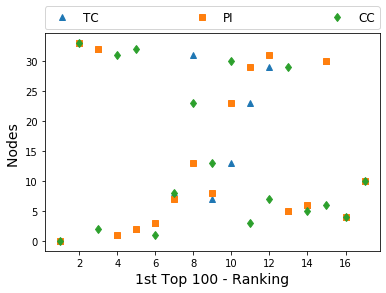

In [23]:
cent = pd.read_csv('csv_results/'+str(net_name)+'_cent.csv') #Get all centralities ranking Table
pro = pd.read_csv('csv_results/'+str(net_name)+'_propose_result_table.csv')#Get all three measures(PI,CC,TC) ranking Table
rank_table = pd.concat([cent,pro], axis=1, sort=False)#join th two Tables
rank_table.index = rank_table.index + 1 #set index to start from 1
k=100
rank_table = pd.DataFrame(rank_table.loc[0:k]) #Get first k ranking
DF= rank_table.drop(['Unnamed: 0'], axis=1)#clean the table


#for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
#plt.plot(DF.index.values,DF.TR.values, '^', label="TR")
#plt.plot(DF.index.values, DF.BC.values,'<', label="BC")
#plt.plot(DF.index.values,DF.CNC.values, 's',label="CNC")
#plt.plot(DF.index.values,DF.PR.values,  'd',label="PR")
plt.plot(DF.index.values,DF.TC.values,  '^',label="TC")
plt.plot(DF.index.values,DF.PI.values,  's',label="PI")
plt.plot(DF.index.values,DF.CC.values,  'd',label="CC")

#k=100
plt.xlabel('1st Top '+str(k)+' - Ranking',fontsize=14)
plt.ylabel('Nodes ',fontsize=14);
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=5, mode="expand", borderaxespad=0.,fontsize=12 )

plt.savefig("img_results/"+str(net_name)+"_TCPICC.png")

### Evaluarting The proposed Method based set of top_k Diffusion ability (ndlib)

In [24]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as si
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
import json

from ndlib.utils import multi_runs
import warnings
warnings.filterwarnings("ignore")

0.13903743315508021


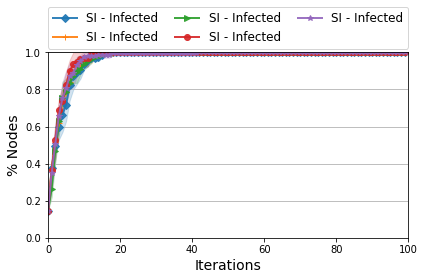

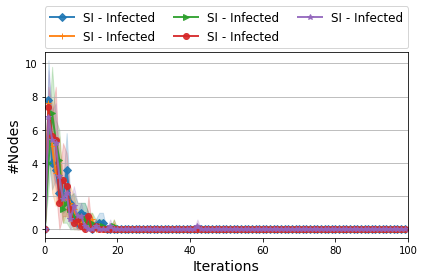

<Figure size 432x288 with 0 Axes>

In [25]:
def get_top_k(k):   
    TR_nodes  = list(top_rank_table['TR'].loc[0:k])
    BC_nodes  = list(top_rank_table['BC'].loc[0:k])
    CNC_nodes = list(top_rank_table['CNC'].loc[0:k])
    PR_nodes  = list(top_rank_table['PR'].loc[0:k])
    TPN_nodes = list(top_rank_table['TPN'].loc[0:k])
    
    return TR_nodes,BC_nodes,CNC_nodes,PR_nodes,TPN_nodes
k=5 
TR_nodes,BC_nodes,CNC_nodes,PR_nodes,TPN_nodes = get_top_k(k)

#define param
b  = nx.density(H)#+0.05
ex = 5
it = 100
print(b)
#================================================================================================
# TR_Model selection
TR_model = si.SIModel(H)
# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b)
TR_infected_nodes = TR_nodes
cfg.add_model_initial_configuration("Infected", TR_infected_nodes)
TR_model.set_initial_status(cfg)
# Simulation execution
iterations = TR_model.iteration_bunch(it)
#TR_trends = TR_model.build_trends(iterations)
TR_trends = multi_runs(TR_model, execution_number=ex, iteration_number=it, nprocesses=4)
#================================================================================================
# BC_Model selection
BC_model = si.SIModel(H)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b)
BC_infected_nodes = BC_nodes
cfg.add_model_initial_configuration("Infected", BC_infected_nodes)
BC_model.set_initial_status(cfg)

# Simulation execution
iterations = BC_model.iteration_bunch(it)
#BC_trends = BC_model.build_trends(iterations)
BC_trends = multi_runs(BC_model, execution_number=ex, iteration_number=it, nprocesses=4)
#=================================================================================================
# CNC_Model selection
CNC_model = si.SIModel(H)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b)
CNC_infected_nodes = CNC_nodes
cfg.add_model_initial_configuration("Infected", CNC_infected_nodes)
CNC_model.set_initial_status(cfg)

# Simulation execution
iterations = CNC_model.iteration_bunch(it)
#CNC_trends = CNC_model.build_trends(iterations)
CNC_trends = multi_runs(CNC_model, execution_number=ex, iteration_number=it, nprocesses=4)
#=================================================================================================
# CNC_Model selection
PR_model = si.SIModel(H)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b)
PR_infected_nodes = PR_nodes
cfg.add_model_initial_configuration("Infected", PR_infected_nodes)
PR_model.set_initial_status(cfg)

# Simulation execution
iterations = PR_model.iteration_bunch(it)
#PR_trends = PR_model.build_trends(iterations)
PR_trends = multi_runs(PR_model, execution_number=ex, iteration_number=it, nprocesses=4)
#=================================================================================================
# CNC_Model selection
TPN_model = si.SIModel(H)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b)
TPN_infected_nodes = TPN_nodes
cfg.add_model_initial_configuration("Infected", TPN_infected_nodes)
TPN_model.set_initial_status(cfg)

# Simulation execution
iterations = TPN_model.iteration_bunch(it)
#TPN_trends = TPN_model.build_trends(iterations)
TPN_trends = multi_runs(PR_model, execution_number=ex, iteration_number=it, nprocesses=4)
#=================================================================================================

#plot/save diffusion trend
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([TR_model,BC_model,CNC_model,PR_model,TPN_model],
                               [TR_trends,BC_trends,CNC_trends,PR_trends,TPN_trends], statuses=['Infected'])
viz.plot(percentile=90)
viz.plot("img_results/"+str(net_name)+"_DiffusionTrend_Top"+str(k)+"_"+str(ex)+"_"+str(it)+"_TR_BC_CNC_PR_TPN.png",percentile=90)

#plot/save diffusion prevalence
from ndlib.viz.mpl.PrevalenceComparison import DiffusionPrevalenceComparison
viz = DiffusionPrevalenceComparison([TR_model,BC_model,CNC_model,PR_model,TPN_model], 
                                    [TR_trends,BC_trends,CNC_trends,PR_trends,TPN_trends], statuses=['Infected'])
viz.plot(percentile=90)
viz.plot("img_results/"+str(net_name)+"_DiffusionPrevalence_Top"+str(k)+"_"+str(ex)+"_"+str(it)+"_TR_BC_CNC_PR_TPN.png",percentile=90)